# Classification of audio signals

In [2]:
import glob
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
%matplotlib inline

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [85]:
# data preparation
#parent_dir = 'sound-data/audio/'
#nme=''
#sub_dir = 'fold11'
#file_ext='*.wav'
#i=0
#for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
    
#    nme='human-11-'+str(i)+'.wav'
#    os.rename(fn,os.path.join(parent_dir, sub_dir,nme))
#    i+=1

## Data preparation
The audio files considered in this are from the sound classification database that is available openly to all for the classification problem. There are 10 different classes in the actual data base that are the most common noises that can be expected in an environment. Now we adjust the source of the audio files by adding up new files from the human speech. Now we have altered the database to have 11 different classes starting from the airconditioner noise to the Human speech.


In [3]:
# The sound files of the corresponding paths are loaded
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load('/Users/shanraja/Desktop/projects/Sound_classification/sound-data/audio/fold1/'+fp)
        raw_sounds.append(X)
    return raw_sounds

# The wave plot of the signals along with the name 
def plot_waves(sound_names,raw_sounds):
    plt.plot(raw_sounds)
    plt.title(sound_names)
    plt.show()
# The specctrogram of the signal is displayed    
def plot_specgram(sound_names,raw_sounds):
    specgram(np.array(raw_sounds), Fs=22050)
    plt.title(sound_names)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    D = librosa.logamplitude(np.abs(librosa.stft(raw_sounds))**2, ref_power=np.max)
    librosa.display.specshow(D,x_axis='time' ,y_axis='log')
    plt.title(sound_names)
    plt.show()



In [4]:
sound_file_paths = ["57320-0-0-7.wav","19026-1-0-0.wav","15564-2-0-1.wav","31323-3-0-1.wav","46669-4-0-35.wav",
                   "89948-5-0-0.wav","46656-6-0-0.wav","103074-7-3-2.wav","106905-8-0-0.wav","108041-9-0-4.wav","human-11-4.wav"]
sound_names = ["air conditioner","car horn","children playing","dog bark","drilling","engine idling",
               "gun shot","jackhammer","siren","street music","human voice"]


raw_sounds = load_sound_files(sound_file_paths)

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):


# Representation of the signal

Below we have listed the different signals considered for this 

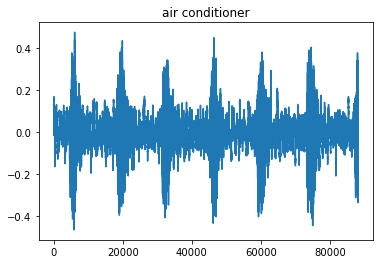

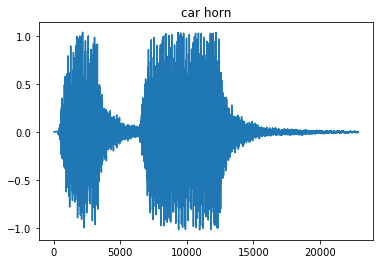

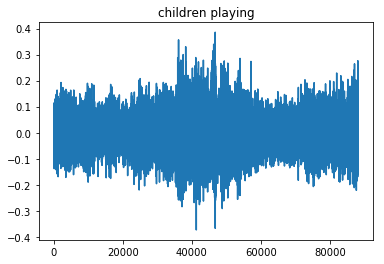

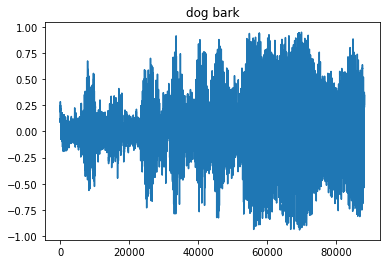

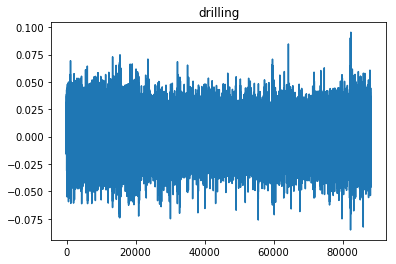

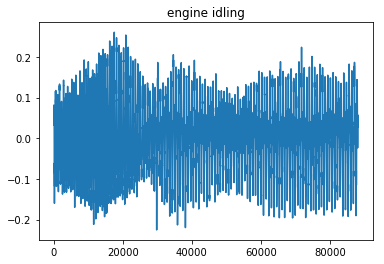

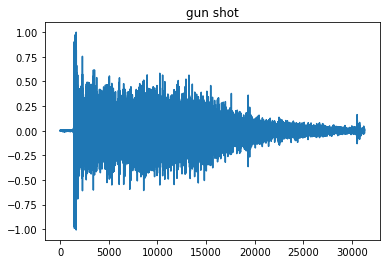

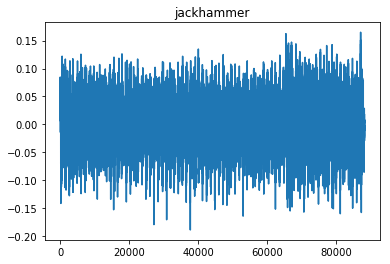

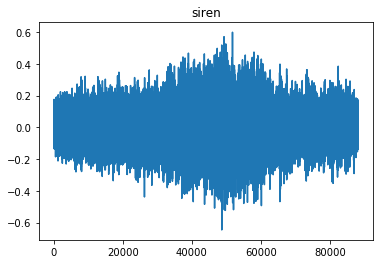

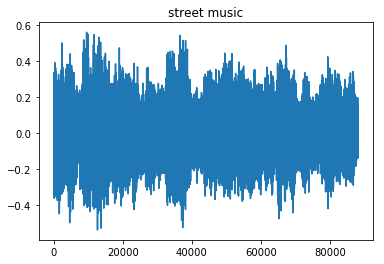

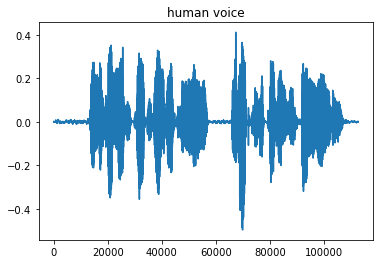

In [91]:
for x,y in zip(sound_names,raw_sounds):
    plot_waves(x,y)


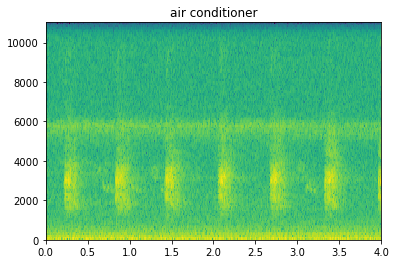

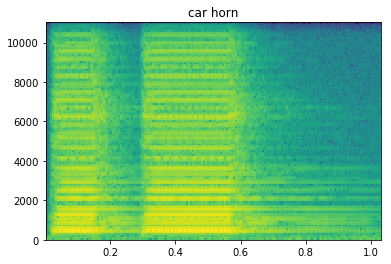

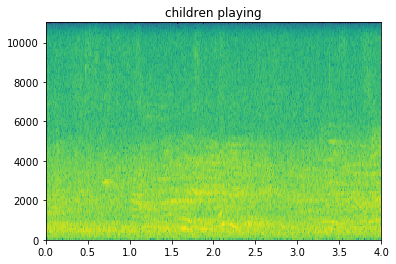

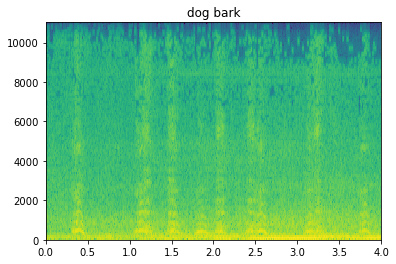

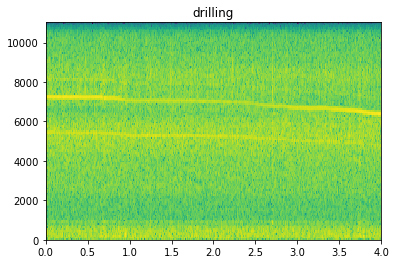

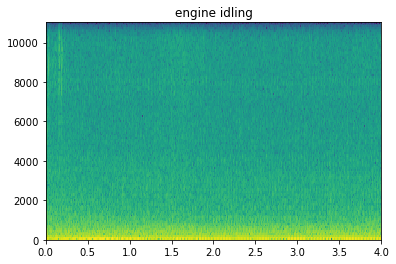

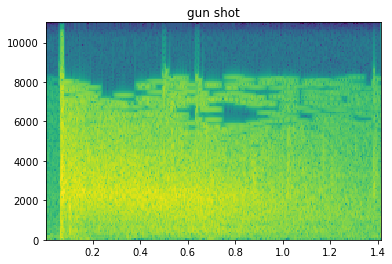

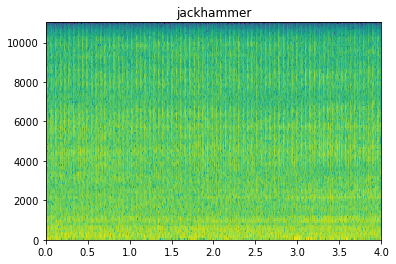

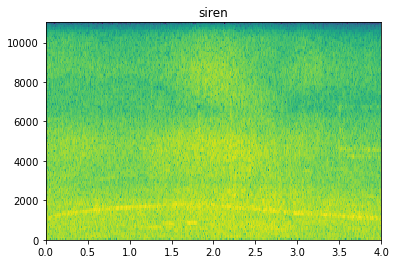

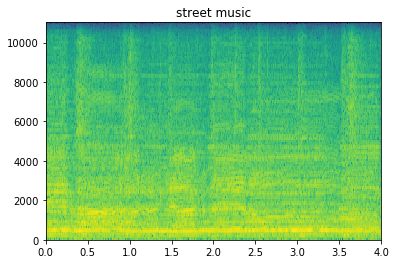

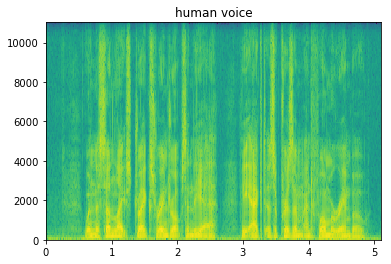

In [92]:
# frequency representation
for n,f in zip(sound_names,raw_sounds):
    plot_specgram(n,f)


/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


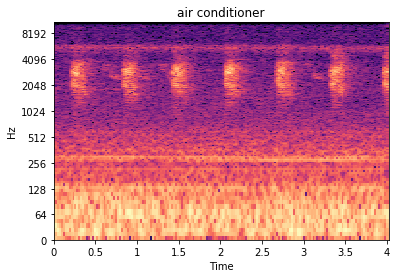

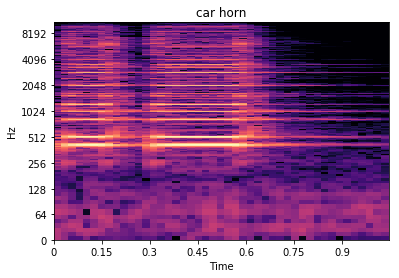

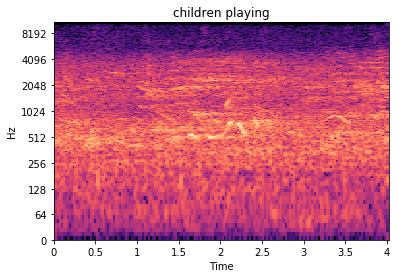

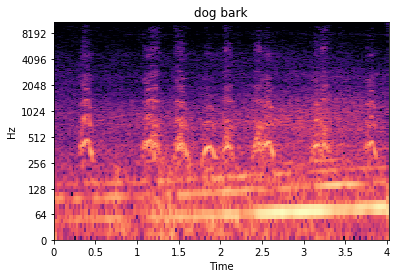

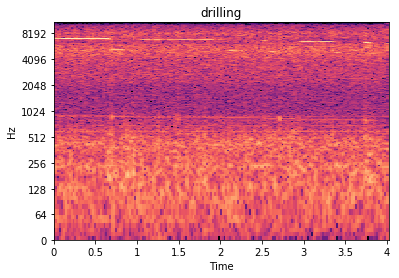

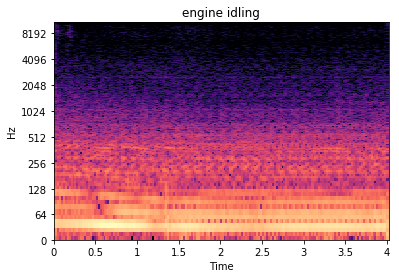

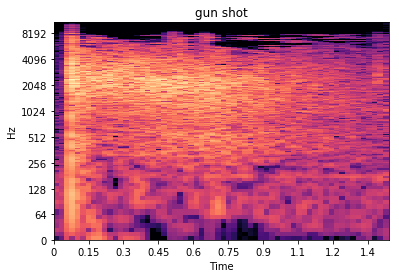

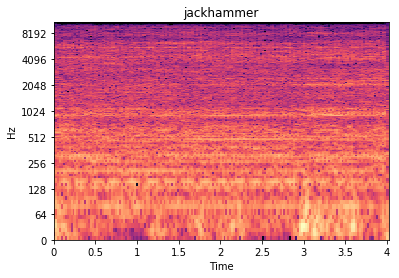

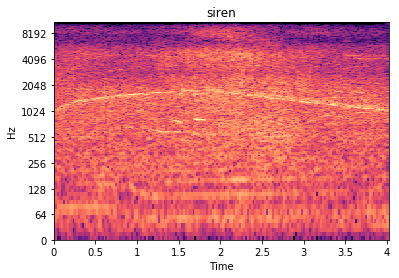

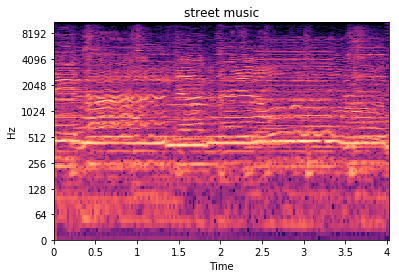

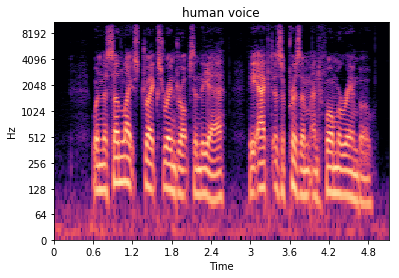

In [93]:
for n,f in zip(sound_names,raw_sounds):
    plot_log_power_specgram(n,f)

From the above graphs we can see that the spectrogram of the different sounds are distinct show some patterns.Now if we are able to retain the features from the spectrogram, then we shall train the neural network to identify different signals , either if it is only human speaking or it is a combination of the human speech

## Feature Extraction<br>
With the help of Librosa library, we can extract useful features from sound data. It provides several methods to extract different features from the sound clips. We are going to use below mentioned methods to extract various features:


### Tonality<br>
Arranges sounds according to pitch relationships into inter- dependent spatial and temporal structures.Characterizing chords, keys, melody, motifs and even form, largely depends on understanding these structures.Harmony: vertical (synchronous) pitch structures.Melody: horizontal (sequential) pitch structures.<br>
### Stft<br>
The short time fourier transform of the signal gives the spectrogram or the frequency time relationship of the signal.
It helps us visualise the change in the frequency of the audio signal.<br>
### MFCCs<br>
The mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal cepstrum. <br>
### Chroma<br>
Chroma describes the angle of pitch rotation as it traverses the helix of the pitch perception.The term chroma feature or chromagram closely relates to the twelve different pitch classes. Chroma-based features, which are also referred to pitch class profiles, are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation.Two octave-related pitches will share the same angle in the chroma circle: a relation that is not captured by a linear pitch scale (or even Mel).For the analysis of western tonal music we quantize this angle into 12 positions or pitch classes.Pitch Class Profiles (PCP): distribution of the signal’s energy across a predefined set of pitch classes (chroma).
###  Mel spectrogram<br>
MelSpectrogram represents an acoustic time-frequency representation of a sound: the power spectral density P(f, t).It is sampled into a number of points around equally spaced times ti and frequencies fj (on a Mel frequency scale).It is typically a a Mel-scaled power spectrogram.

### Contrast<br>
Octave-Based Spectral Contrast considers the spectral peak, spectral valley and their difference in each sub-band. For most music, the strong spectral peaks roughly correspond with harmonic components; while non-harmonic components, or noises, often appear at spectral valleys. Thus, Spectral Contrast feature could roughly reflect the relative distribution of the harmonic and non-harmonic components in the spectrum. Previous features, such as MFCC, average the spectral distribution in each sub-band, and thus lose the relative spectral information, Considering two spectra which have different spectral distribution may have similar average spectral characteristics, the average spectral distribution is not sufficient to represent the spectral characteristics of music. However, Spectral Contrast keeps more information and may have a better discrimination in music type classification.

### Tonnetz<br>
The Tonnetz is a pitch space defined by the network of relationships between musical pitches in just intonation (Euler, 1739).Close harmonic relations are modeled as short distances on an infinite Euclidian plane.Chords become geometric structures on the plane, keys are defined by regions in the harmonic network.





In [6]:
# inputs to the neural network
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            
            try:
              mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            except Exception as e:
              print ("Error encountered while parsing file: ", fn)
              continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, fn.split('/')[-1].split('-')[1])
    return np.array(features), np.array(labels, dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)

    n_unique_labels = len(np.unique(labels))+1
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [7]:
sound_file_paths = ["57320-0-0-7.wav","19026-1-0-0.wav","15564-2-0-1.wav","31323-3-0-1.wav","46669-4-0-35.wav",
                   "89948-5-0-0.wav","46656-6-0-0.wav","103074-7-3-2.wav","106905-8-0-0.wav","108041-9-0-4.wav","human-11-4.wav"]
parent_dir_disp = 'sound-data/audio/fold1'

mfccs_lst=[]
chroma_lst=[]
mel_lst=[]
contrast_lst=[]
tonnetz_lst=[]
for i in sound_file_paths:
    file=os.path.join(parent_dir_disp,i)
    mfccs,chroma,mel,contrast,tonnetz=extract_feature(file)
    mfccs_lst.append(mfccs)
    chroma_lst.append(chroma)
    mel_lst.append(mel)
    contrast_lst.append(contrast)
    tonnetz_lst.append(tonnetz)

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

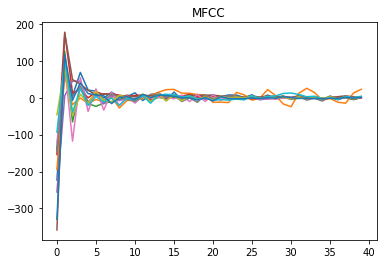

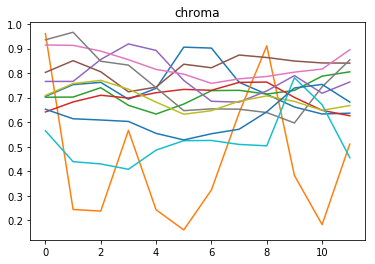

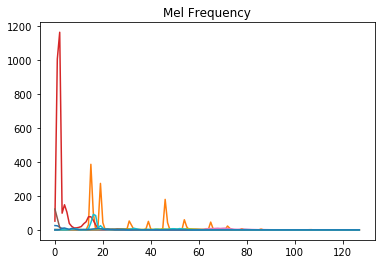

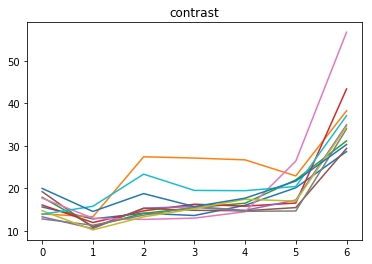

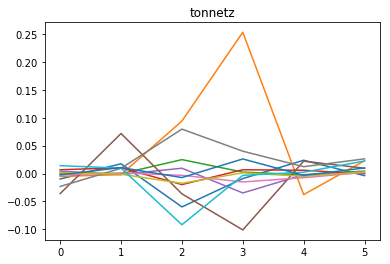

In [ ]:
# plotting the features of all the different sound signals 
# plotting the features of 6 different speakers 

   
for j in mfccs_lst:
    plt.plot(j)
plt.title('MFCC')
plt.show()    
for k in chroma_lst:
    plt.plot(k)
plt.title('chroma')
plt.show()    
for l in mel_lst:
    plt.plot(l)
plt.title('Mel Frequency')
plt.show()    
for m in contrast_lst:
    plt.plot(m)
plt.title('contrast')
plt.show()    
for n in tonnetz_lst:
    plt.plot(n)
plt.title('tonnetz')
plt.show()    

From the above graph it is very clear that the features such as contrast,tonnetz and chroma show some visible difference between different audio files.We cannot discard the other features just because they do not show any visible difference between each other.Hence the features considered are all the 5 factors.

In [ ]:
parent_dir = 'sound-data/audio/'
#sub_dirs = ["fold1","fold2","fold3","fold4"]
sub_dirs=["fold1","fold2","fold3","fold4","fold5","fold6","fold7"]
features, labels = parse_audio_files(parent_dir,sub_dirs)
labels = one_hot_encode(labels)

train_test_split = np.random.rand(len(features)) < 0.70
train_x = features[train_test_split]
train_y = labels[train_test_split]
test_x = features[~train_test_split]
test_y = labels[~train_test_split]



/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

In [208]:

# learning parameters
training_epochs = 5000
n_dim = tr_features.shape[1]
n_classes = 12
n_hidden_units_one = 280 
n_hidden_units_two = 300
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.03

In [ ]:
# Multilayer perceptron
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X,W_1) + b_1)

W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], 
mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)

W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.global_variables_initializer()

In [210]:
# The cost function is assumed to cross-entropy
cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 
# Gradient Descent optimizer is used to reduce the loss function 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [211]:

cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):            
        _,cost = sess.run([optimizer,cost_function],feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,cost)
    
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: test_x})
    y_true = sess.run(tf.argmax(test_y,1))

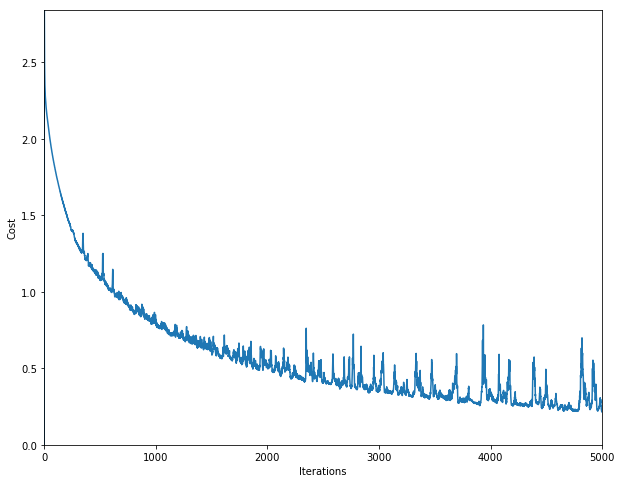

F-Score: 0.864


array([[190,   1,  15,   0,   2,   2,   1,   6,   0,   1,   0],
       [  1,  94,   3,   5,   5,   0,   1,   1,   0,   5,   0],
       [  3,   0, 160,  13,   1,   0,   0,   4,   5,   7,   2],
       [  0,   2,  12, 179,   2,   1,   2,   2,   9,   3,   0],
       [  0,   3,   7,   5, 187,   2,   1,   4,   3,   6,   0],
       [  1,   1,   7,   2,   0, 198,   1,   0,   6,   0,   0],
       [  0,   0,   3,  12,   1,   0,  59,   0,   0,   1,   0],
       [  1,   0,   3,   0,   7,   0,   0, 216,   0,   0,   0],
       [  1,   0,   4,   8,   0,   2,   3,   0, 199,   1,   0],
       [  2,   4,  43,  20,   4,   6,   0,   1,   3, 135,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 259]])

In [212]:


fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print ("F-Score:", round(f,3))

confusion_matrix(y_true,y_pred)

From the results, we can see that the False negative overlap is between the actual human voice and the children playing. It makes more sense that the overlapp is between the two as both of them has a very similar characteristics.Now given that we have a very reliable classification of the noise and the human voices, now we can use this knowledge to remove the particular noise in a current scenario.

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    y_pred = sess.run(tf.argmax(y_,2),feed_dict={X: test_x[1]})
    
    